In [64]:
import iris 
import matplotlib.pyplot as plt
import iris.coord_categorisation
import numpy as np
import cartopy as cart
import os
import pandas as pd
import cartopy as cart
import glob

In [69]:
#--------------------------------------------------------------------------
# LOAD DATAFRAMES
#--------------------------------------------------------------------------

os.chdir('C:\\Users\\fb428\\OneDrive - University of Exeter\\Documents\\PhD\\papers\\manuscript3\\figures_and_data\\figure_making\\output_files\\')

site_info = pd.read_csv('station_info.csv')

site_data = pd.read_csv('monthly_mean_site.csv')
UKESM_data = pd.read_csv('monthly_mean_UKESM.csv')
max_data = pd.read_csv('site_daily_max.csv')

In [70]:
sites = pd.merge(site_data, UKESM_data, on=['item', 'Month'], how='outer')
sites_with_max = pd.merge(sites, max_data, on=['item', 'Month'], how='outer')

In [71]:
sites_with_max

,item,Month,mean_site,std_site,mean_UKESM,std_UKESM,Ozone_avg
0,0,1,17.039619,2.360032,24.907665,1.739321,26.000990
1,0,2,18.875509,1.222439,26.418036,2.454562,25.655311
2,0,3,20.682808,0.864310,25.688047,3.427086,33.985321
3,0,4,18.978680,0.696612,23.383913,0.776733,32.532157
4,0,5,14.884635,0.447750,23.538794,1.162142,22.449025
...,...,...,...,...,...,...,...
223,17,8,NaN,NaN,28.107613,5.370385,NaN
224,17,9,NaN,NaN,28.347418,2.483653,NaN
225,17,10,NaN,NaN,28.731567,2.224027,NaN
226,17,11,NaN,NaN,24.819082,1.889387,NaN


In [72]:
#--------------------------------------------------------------------------
# MERGE ALL SITES AND ADD NAMES
#--------------------------------------------------------------------------

locs = site_info[['item', 'name']].drop_duplicates()
chose_names = ['Amazonas', 'Porto Velho', 'Santarem', 'Congo', 'Bukit Koto', 'Watukosek',  'Daintree', 'Panama' ]

site_names = pd.merge(sites_with_max, locs, on=['item'])

chose_sites = site_names[site_names['name'].isin(chose_names)]

n = len(chose_names)


In [73]:
month_list = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

In [74]:
sites = chose_sites.groupby(['name', 'Month']).mean().reset_index()

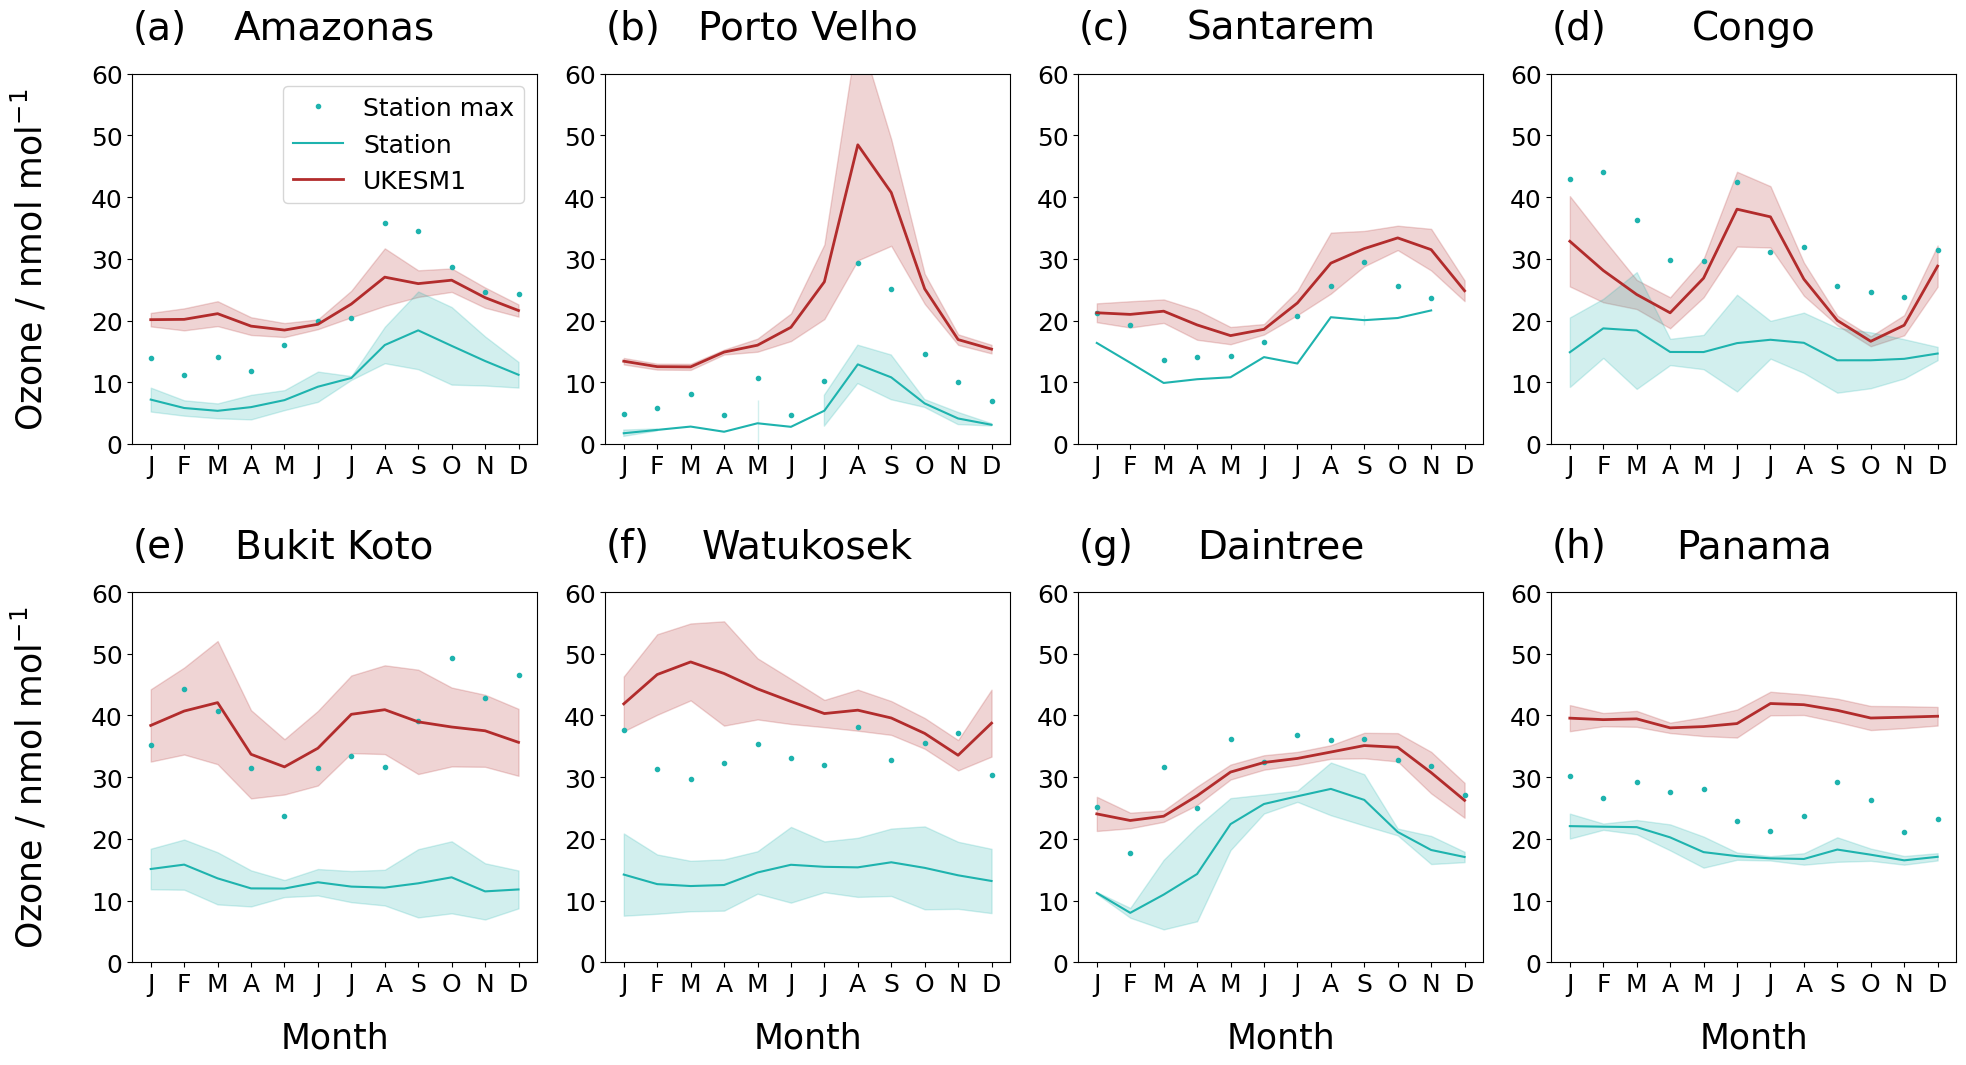

In [79]:
#----------------------------------------------------------------
# monthly mean
#----------------------------------------------------------------

plt.figure(figsize=(20,11))
plt.rcParams['font.size']=18

letter_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(j)', '(k)']

for i in range(n):
    plt.subplot(2,4,i+1)
    
    site_name = chose_names[i]
    
#--------------------------------mean data--------------------------------------------
     
    site_df = sites[sites['name'] == site_name]    
    site_data = site_df['mean_site'].values
       
    UKESM_data = site_df['mean_UKESM'].values
    
        
    plt.errorbar(site_df['Month'].values, site_data,
                 elinewidth = 1,  color=[0.1157, 0.7022, 0.6843], label = 'Station')
    
    
    plt.errorbar(site_df['Month'].values, UKESM_data,
                 elinewidth = 1, color=[0.6980, 0.1725, 0.1725], linewidth=2, label = 'UKESM1')
    
#--------------------------------std data--------------------------------------------

  
    yerr_site = site_df['std_site'].values
    yerr_UKESM = site_df['std_UKESM'].values
    
    plt.fill_between(site_df['Month'].values, UKESM_data+yerr_UKESM, UKESM_data-yerr_UKESM, 
                     color=[0.6980, 0.1725, 0.1725], alpha = 0.2)
    
    plt.fill_between(site_df['Month'].values, site_data+yerr_site, site_data-yerr_site, 
                     color=[0.1157, 0.7022, 0.6843], alpha = 0.2)
    
#--------------------------------max data--------------------------------------------
   
    site_max = site_df['Ozone_avg'].values
    plt.plot(site_df['Month'].values, site_max, '.', markersize = 6,  color=[0.1157, 0.7022, 0.6843], label = 'Station max')

    # axes
    plt.title(site_name, size=28, pad=25)
    plt.title(letter_labels[i], loc='left', size=28, pad=25)
    plt.ylim(0,60)
    plt.xticks(site_df['Month'].values, month_list)

for i in [1,5]:
    plt.subplot(2,4,i)    
    plt.ylabel('Ozone / nmol mol$^{-1}$', size = 25, labelpad = 30)
    
for i in range(5,9):
    plt.subplot(2,4,i) 
    plt.xlabel('Month', size = 25, labelpad = 18)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

plt.subplot(241)
plt.legend()

plt.savefig('figures/seasonal_cycle.png', dpi=300)

In [62]:
bias_corr = [2,4,1.5,1.8,3,3,1.5,2]

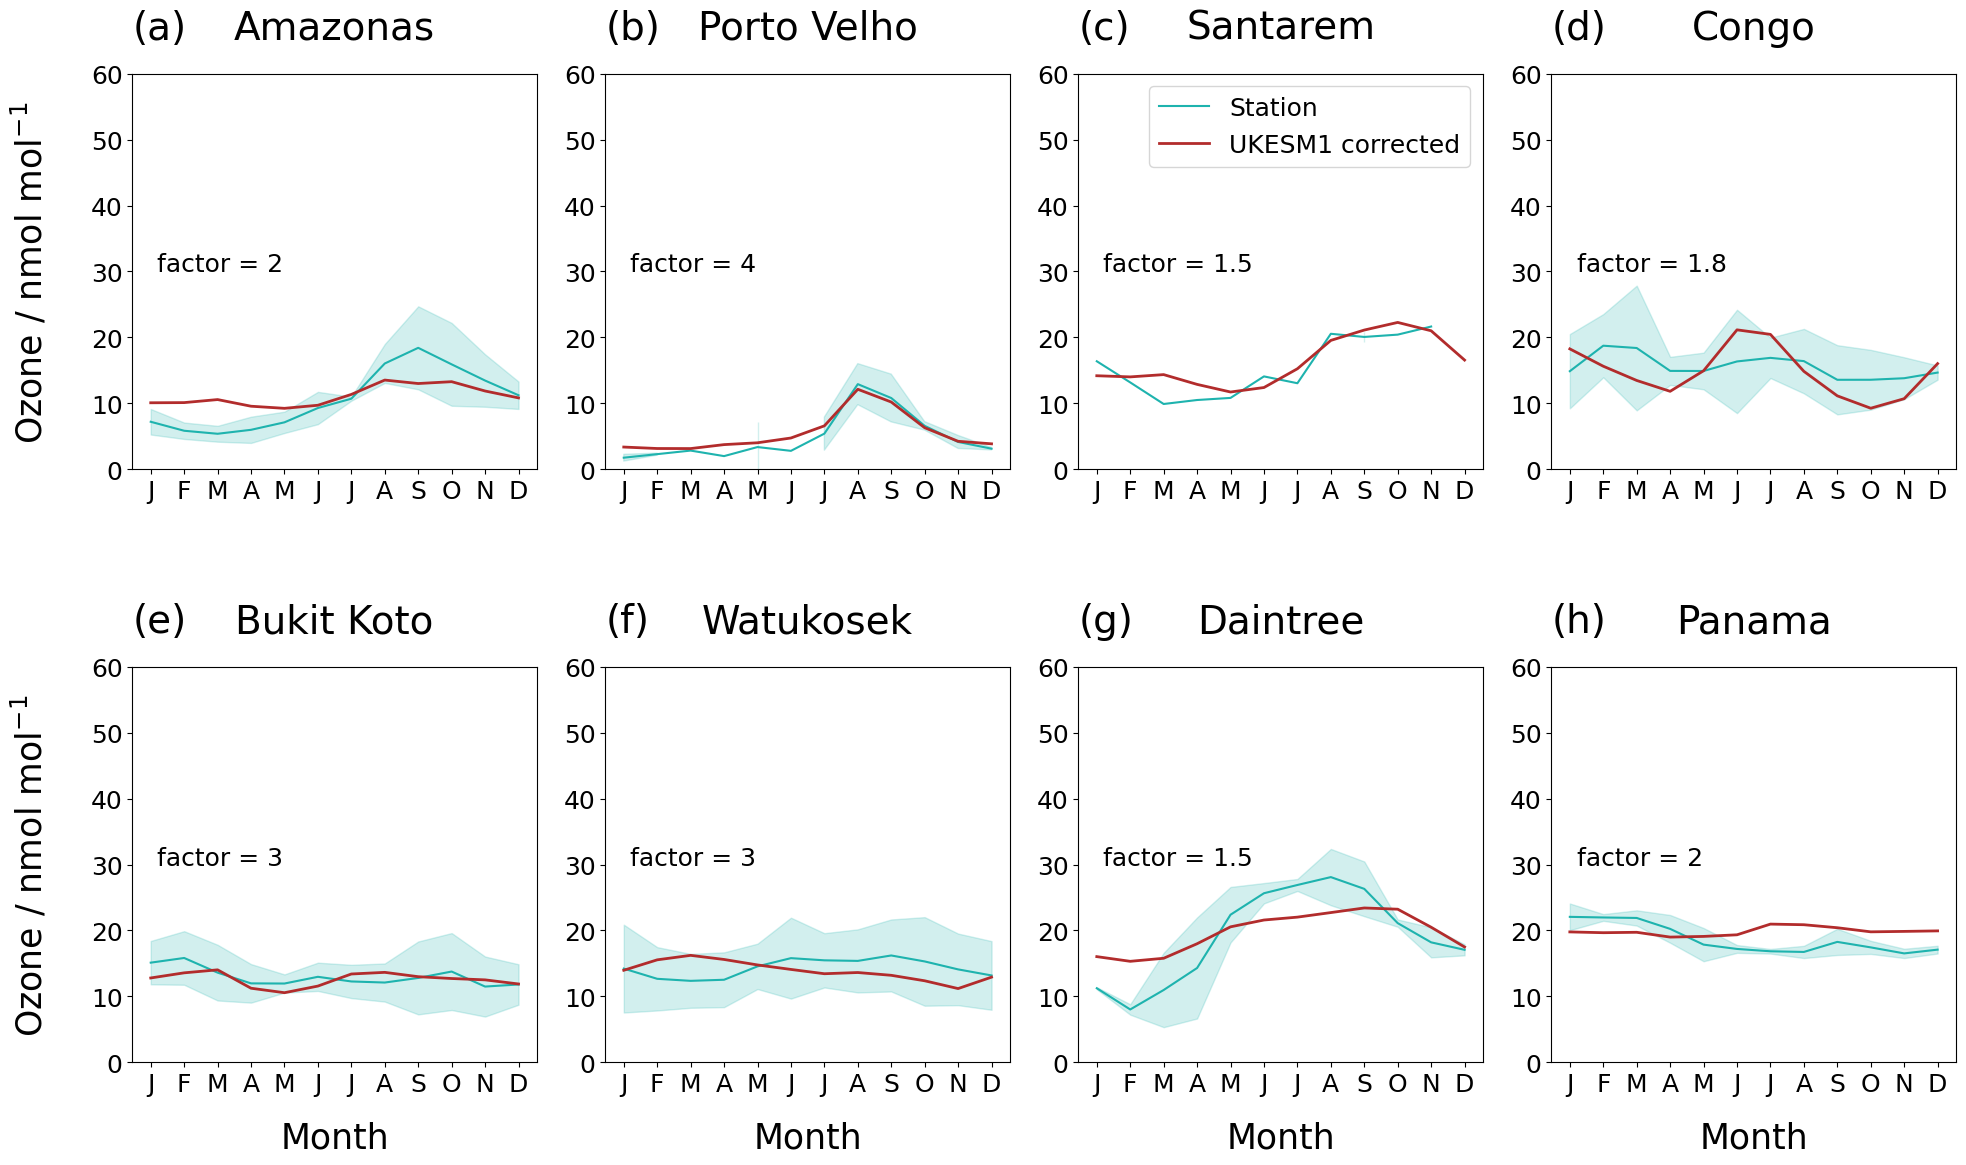

In [80]:
#----------------------------------------------------------------
# monthly mean
#----------------------------------------------------------------

plt.figure(figsize=(20,12))
plt.rcParams['font.size']=18

letter_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(j)', '(k)']

for i in range(n):
    plt.subplot(2,4,i+1)
    
    site_name = chose_names[i]
    
#--------------------------------mean data--------------------------------------------
     
     
    site_df = sites[sites['name'] == site_name]    
    site_data = site_df['mean_site'].values
       
    UKESM_data = site_df['mean_UKESM'].values/bias_corr[i]
    
        
    plt.errorbar(site_df['Month'].values, site_data,
                 elinewidth = 1,  color=[0.1157, 0.7022, 0.6843], label = 'Station')
    
    
    plt.errorbar(site_df['Month'].values, UKESM_data,
                 elinewidth = 1, color=[0.6980, 0.1725, 0.1725], linewidth=2, label = 'UKESM1 corrected')
    
#--------------------------------std data--------------------------------------------

  
    yerr_site = site_df['std_site'].values

    plt.fill_between(site_df['Month'].values, site_data+yerr_site, site_data-yerr_site, 
                     color=[0.1157, 0.7022, 0.6843], alpha = 0.2)
    

    plt.text(1.2,30, 'factor = %s' %bias_corr[i], size = 18)
    
    # axes
    plt.title(site_name, size=28, pad=25)
    plt.title(letter_labels[i], loc='left', size=28, pad=25)
    plt.ylim(0,60)
    plt.xticks(site_df['Month'].values, month_list)

for i in [1,5]:
    plt.subplot(2,4,i)    
    plt.ylabel('Ozone / nmol mol$^{-1}$', size = 25, labelpad = 30)
    
for i in range(5,9):
    plt.subplot(2,4,i) 
    plt.xlabel('Month', size = 25, labelpad = 18)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

plt.subplot(243)
plt.legend()

plt.savefig('figures/seasonal_factors.png', dpi=450)

In [33]:
np.mean((sites[sites['name'] == 'Daintree']['mean_UKESM'].values))

29.578200000000006

In [35]:
np.mean((sites[sites['name'] == 'Daintree']['mean_site'].values))

19.187853065881686

In [37]:
np.max((sites[sites['name'] == 'Congo']['mean_site'].values)) - np.min((sites[sites['name'] == 'Congo']['mean_site'].values))

5.173396528536141

In [38]:
np.max((sites[sites['name'] == 'Congo']['mean_UKESM'].values)) - np.min((sites[sites['name'] == 'Congo']['mean_UKESM'].values))

21.411362999999998

In [77]:
print(np.max((sites[sites['name'] == 'Congo']['Ozone_avg'].values)))
print(np.min((sites[sites['name'] == 'Congo']['Ozone_avg'].values)))

44.02299587
23.85865667


In [78]:
print(np.max((sites[sites['name'] == 'Bukit Koto']['Ozone_avg'].values)))
print(np.min((sites[sites['name'] == 'Bukit Koto']['Ozone_avg'].values)))

49.335
23.75


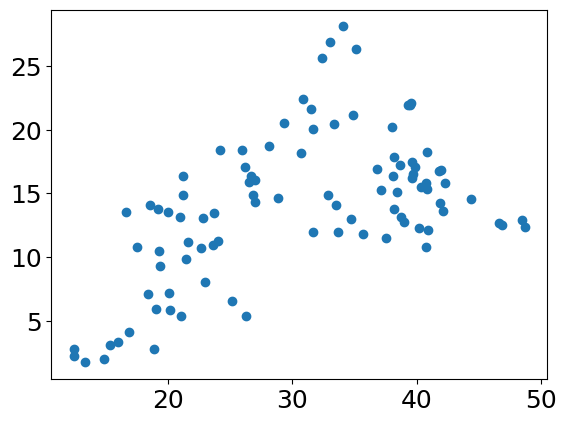

In [39]:
plt.plot(sites['mean_UKESM'], sites['mean_site'], 'o')

In [40]:
len(sites['mean_UKESM'])/8

12.0

In [53]:
cor = sites[['name', 'Month','item', 'mean_site','mean_UKESM', 'std_UKESM']].dropna()

In [54]:
np.corrcoef(cor['mean_UKESM'], cor['mean_site'])**2

array([[1.        , 0.28881808],
       [0.28881808, 1.        ]])

In [55]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(cor['mean_UKESM'].values, cor['mean_site'].values)

18.42800223471641